In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

# Importando as Datas dos pedidos para algumas analises
path2 = 'BancoDeDados/BancoDeDados.csv'
df = pd.read_csv(path2, sep=',')

# Importantdo a base de dados com
path = 'df_final_sujo.csv'
data = pd.read_csv(path, sep=',')
data = data[['id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia',
            'FrequenciaCluster', 'Receita', 'ReceitaCluster']]

data['horario_pedido'] = df['horario_pedido']
data['horario_pedido'] = pd.to_datetime(data['horario_pedido'], format='%Y-%m-%d %H:%M:%S')
data.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,horario_pedido
0,0000366f3b9a7992bf8c76cfdf3221e2,115,3,1,0,141.90,0,2017-05-16 15:05:35
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,3,1,0,27.19,0,2017-11-09 00:50:13
2,0000f46a3911fa3c0805444483337064,541,0,1,0,86.22,0,2017-11-09 00:50:13
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,1,0,43.62,0,2017-05-07 20:11:26
4,0004aac84e0df4da2b147fca70cf8255,292,1,1,0,196.89,0,2018-02-03 19:45:40


In [10]:
# Criando uma pontuaçao para os melhores clientes dentro da nossa carteira!
data['Pontuacao'] = (data['RecenciaCluster'] + 
                     data['FrequenciaCluster']+
                     data['ReceitaCluster'])
data.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,horario_pedido,Pontuacao
0,0000366f3b9a7992bf8c76cfdf3221e2,115,3,1,0,141.90,0,2017-05-16 15:05:35,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,3,1,0,27.19,0,2017-11-09 00:50:13,3
2,0000f46a3911fa3c0805444483337064,541,0,1,0,86.22,0,2017-11-09 00:50:13,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,1,0,43.62,0,2017-05-07 20:11:26,1
4,0004aac84e0df4da2b147fca70cf8255,292,1,1,0,196.89,0,2018-02-03 19:45:40,1


In [3]:
print(f'A maior pontuacao encontrada na nossa carteira de clientes é: {data.Pontuacao.max()}')

A maior pontuacao encontrada na nossa carteira de clientes é: 7


In [11]:
# Setando todos os valores da coluna para inativo, em um primeiro momento
data['Segmento'] = 'Inativo'
# Criando uma segmentaçao onde, CASO a nota do cliente seja
# >= 1 Iremos chamalo de bussines, 
data.loc[data['Pontuacao']>=1,'Segmento'] = 'Bussines'
data.loc[data['Pontuacao']>=3,'Segmento'] = 'Master'
data.loc[data['Pontuacao']>=5,'Segmento'] = 'Premium'

In [12]:
melhores_clientes = data.loc[data['Pontuacao']>=7]
print(f'Temos um total de {melhores_clientes.shape[0]} clientes que possuem a melhor nota da nossa carteira')

Temos um total de 24 clientes que possuem a melhor nota da nossa carteira


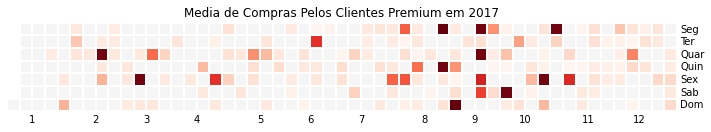

In [33]:
clientes_premium = data.loc[data['Segmento'] == 'Premium']
clientes_master = data.loc[data['Segmento'] == 'Master']
clientes_bussines = data.loc[data['Segmento'] == 'Bussines']

eventos_premium = pd.Series(clientes_premium['Receita'])
eventos_premium.index = clientes_premium['horario_pedido']

plt.figure(figsize=(12,12))
calmap.yearplot(eventos_premium, year=2017, 
                daylabels=['Seg', 'Ter', 'Quar', 'Quin', 'Sex', 'Sab', 'Dom'],
                monthlabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                how='mean', dayticks=True, linewidth=1
               );

plt.title('Media de Compras Pelos Clientes Premium em 2017');

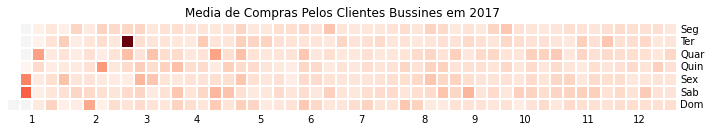

In [29]:
eventos_bussines = pd.Series(clientes_bussines['Receita'])
eventos_bussines.index = clientes_bussines['horario_pedido']

plt.figure(figsize=(12,12))
calmap.yearplot(eventos_bussines, year=2017, 
                daylabels=['Seg', 'Ter', 'Quar', 'Quin', 'Sex', 'Sab', 'Dom'],
                monthlabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                how='mean', dayticks=True, linewidth=1
               );

plt.title('Media de Compras Pelos Clientes Bussines em 2017');

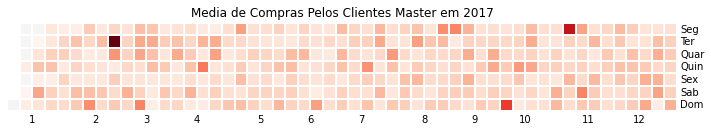

In [28]:
eventos_master = pd.Series(clientes_master['Receita'])
eventos_master.index = clientes_master['horario_pedido']

plt.figure(figsize=(12,12))
calmap.yearplot(eventos_master, year=2017, 
                daylabels=['Seg', 'Ter', 'Quar', 'Quin', 'Sex', 'Sab', 'Dom'],
                monthlabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                how='mean', dayticks=True, linewidth=1
               );

plt.title('Media de Compras Pelos Clientes Master em 2017');

In [ ]:
eventos_master = pd.Series(clientes_master['Receita'])
eventos_master.index = clientes_master['horario_pedido']

plt.figure(figsize=(12,12))
calmap.yearplot(eventos_master, year=2017, 
                daylabels=['Seg', 'Ter', 'Quar', 'Quin', 'Sex', 'Sab', 'Dom'],
                monthlabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                how='mean', dayticks=True, linewidth=1
               );

plt.title('Media de Compras Pelos Clientes Master');

<p align='center'>Analise visual dos grupos Segmentados!</p>

In [10]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x, y=y, hue='Segmento',data=data,size='Segmento',
                    sizes=(50, 150), size_order=['Premium','Master','Bussines','Inativo'])
    plt.tight_layout()

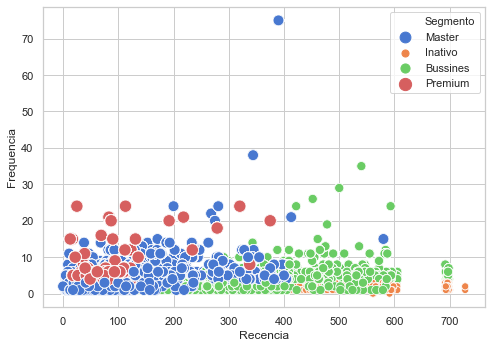

In [14]:
plot_segmento('Recencia', 'Frequencia', data=data)

<p>Podemos observar um outlier, um master com +\- 400 de recencia, apesar de fazer muito tempo que ele nao compra ele era um cliente bem frequente na nossa loja!</p>

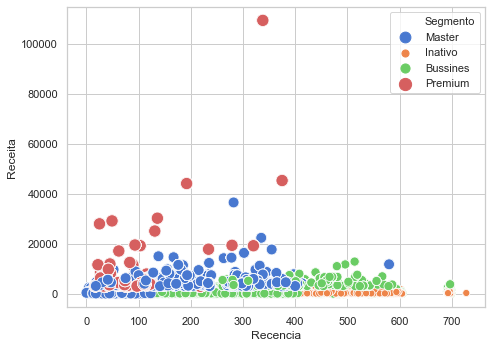

In [12]:
plot_segmento('Recencia', 'Receita', data)

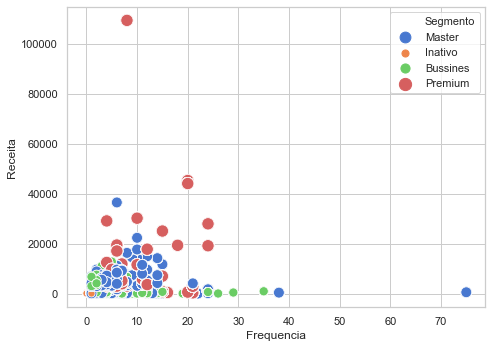

In [13]:
plot_segmento('Frequencia','Receita', data)

<ul>
    <li>Clientes que compram muito mas com um ticket medio baixo sao considerados Master</li>
    <br>
    <li>Clientes que compram pouco com uma frequencia baixa foram marcados como inativos, provavelmente o valor de recencia esta muito alto tambem!</li>
    <br>
    <li>Clientes com um ticket medio alto e uma frequencia nao tao alta foram marcados como Premium, que sao considerados nossos melhores clientes!</li>
</ul>

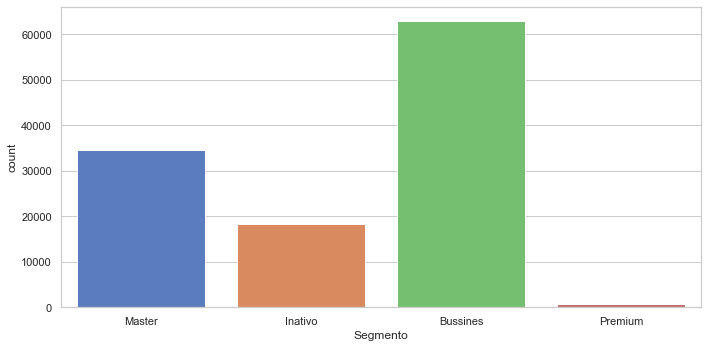

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data['Segmento'])
plt.tight_layout()

In [21]:
data.Segmento.value_counts()

Bussines    62938
Master      34620
Inativo     18354
Premium       669
Name: Segmento, dtype: int64

In [18]:
# Quanto em valor cada grupo agrega ao negocio?
data.groupby('Segmento').agg({'Receita':'mean',
                              'Recencia':'mean',
                              'Frequencia':'mean'}).sort_values(by='Receita')

,Receita,Recencia,Frequencia
Segmento,,,
Inativo,202.075241,490.101831,1.284025
Bussines,265.552226,260.836442,1.631892
Master,486.284449,80.904159,2.258925
Premium,11374.931734,112.452915,12.001495


<p>Podemos ver que um cliente Premium vale 20x mais que um cliente Master, eles sem duvida merecem um tratamento especial</p>

<h3> Com base na analise quais Estrategias podemos aplicar? </h3>
<br>
<ol>
    <li>Foco na satisfação do cliente</li>
    <p>Uma grande ênfase deve ser colocada para manter os clientes satisfeitos, oferecendo-lhes uma experência positiva toda vez que interagirem com os negócios</p>
    <br>
    <li>Tornar as interações mais pessoais</li>
    <p>O cliente fez aniversario?, mandar um cupom de desconto, desejando o feliz aniversario, um time atento ao cliente que compra muito e coletar um feedback do cliente, para analisar como ele avalia todo o processo, se ele sente falta de algo</p>
    <br>
    <li> Construir uma comunidade </li>
    <p>Se voce e um negocio tradicional, considere a realizaçao de eventos para clientes que lhes permitam conhecer outras pessoas ideias semelhantes na area</p>
    <br>
    <li>Oferecer recompensas instantâneas sem amarras</li>
    <p>Procurar clientes que compram muito, e enviar um desconto especial as areas que eles compraram recentemente!</p>
    <br>
    <li>Criar um programa de fidelidade</li>
    <p>Propor aos clientes algo para trabalhar a longo prazo pode fazer com que eles desejem retornar aos negocios</p>
    <br>
    <li>Aumentar o envolvimento nas midias sociais</li>
    <p>As midias sociais dao a sua empresa acesso direto aos usuarios e podem atualiza-los sobre quaisquer ofertas ou promoções</p>
    
</ol>

<p>Açoes a serem tomadas:<br>
    1. Tentar recuperar os clientes "Inativos" <br>
    2. Fornecer descontos especiais de frete aos clientes "Master"<br>
    3. Descontos especiais aos "Premium" e atendimento especializado <br>
</p>